In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
# from math sqrt
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor

train=pd.read_csv(r'train.csv')
tst = pd.read_csv(r'test.csv')

x_train = train
x_train['Date'] = pd.to_datetime(x_train['Date'], errors='coerce')
# x_train['Season'] = x_train['Date'].dt.month
# x_train['Season']=x_train['Season'].replace([4,5,6,7,8,9],1)
# x_train['Season']=x_train['Season'].replace([1,2,3,10,11,12],0)
# x_train['Weekend'] = x_train['Date'].dt.dayofweek
# x_train['Weekend']=x_train['Weekend'].replace([0,1,2,3,4,5,6],[0,0,0,0,1,1,0])
x_train.head()
test = train['n_Procedure']
print(tst)

          Date  Temperature  EventTarget
0    11/1/2016           28            0
1    11/2/2016           29            0
2    11/3/2016           29            0
3    11/4/2016           32            0
4    11/5/2016           31            0
5    11/6/2016           34            0
6    11/7/2016           34            0
7    11/8/2016           27            0
8    11/9/2016           29            0
9   11/10/2016           31            2
10  11/11/2016           33            2
11  11/12/2016           27            2
12  11/13/2016           26            0
13  11/14/2016           33            0
14  11/15/2016           26            1
15  11/16/2016           30            1
16  11/17/2016           25            1
17  11/18/2016           30            0
18  11/19/2016           29            0
19  11/20/2016           30            0
20  11/21/2016           26            0
21  11/22/2016           31            0
22  11/23/2016           31            0
23  11/24/2016  

In [26]:
print(x_train)

          Date Procedure  n_Procedure  Temperature  EventTarget
0   2015-12-11         A            1           27            1
1   2015-12-11         B            1           27            1
2   2015-12-11         C            0           27            1
3   2015-12-12         A            3           21            0
4   2015-12-12         B            2           21            0
..         ...       ...          ...          ...          ...
973 2016-10-30         B            9           32            0
974 2016-10-30         C            0           32            0
975 2016-10-31         A            5           34            0
976 2016-10-31         B            4           34            0
977 2016-10-31         C            3           34            0

[978 rows x 5 columns]


In [18]:
x_a = []
y_a = []
x_b = []
y_b = []
x_c = []
y_c = []
for i in range(len(test)):
    if(x_train['Procedure'][i] == 'A'):
        x_a.append([x_train['Temperature'][i],x_train['EventTarget'][i]])
        y_a.append(test[i])
    elif(train['Procedure'][i] == 'B'):
        x_b.append([x_train['Temperature'][i],x_train['EventTarget'][i]])
        y_b.append(test[i])
    elif(train['Procedure'][i] == 'C'):
        x_c.append([x_train['Temperature'][i],x_train['EventTarget'][i]])
        y_c.append(test[i])

In [19]:
X = []
Y = []
prev = 20
for i in range(prev):
    X.append(x_a[i])
    Y.append(y_a[i])

In [20]:
clf = XGBRegressor(colsample_bytree = 1, learning_rate = 1,
                max_depth = 5, alpha = 5, n_estimators = 10)
# clf = SVR(C = 100)
clf.fit(X, Y)
y_pred = clf.predict(X)
for i in range(prev,len(x_a)):
    y_pred = np.append(y_pred, clf.predict([x_a[i]]))
    del X[0]
    X.append(x_a[i])
    del Y[0]
    Y.append(clf.predict(x_a[i]))
    clf = XGBRegressor(colsample_bytree = 1, learning_rate = 1,
                max_depth = 5, alpha = 5, n_estimators = 10)
    clf.fit(X,Y)
#     print(y_pred)

[00:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[00:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[00:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [21]:
y_pred=np.round(y_pred)

In [22]:
print(np.exp(-sqrt(mean_squared_error(y_a,y_pred))))
print(sqrt(mean_squared_error(y_a,y_pred)))
print(y_pred)

0.10226208215760975
2.280216328129304
[ 1.  3.  5.  8. 10.  5.  5.  9.  4.  4.  4. 10.  5.  5.  5.  3.  5.  8.
  8.  8.  5.  3.  3.  3.  5.  6.  6.  8.  4.  5.  8.  6.  3.  6.  8.  3.
  8.  8.  8.  5.  8.  5.  4.  5.  5.  5.  8.  4.  5.  5.  3.  3.  3.  6.
  8.  3.  5.  4.  4.  5.  6.  6.  6.  8.  3.  6.  6.  6.  6.  4.  4.  8.
  5.  5.  5.  5.  6.  4.  6.  5.  6.  4.  4.  5.  6.  4.  5.  4.  4.  6.
  4.  6.  5.  5.  5.  4.  5.  5.  6.  4.  6.  5.  5.  4.  6.  4.  5.  5.
  5.  5.  5.  6.  6.  6.  6.  6.  4.  5.  4.  4.  4.  4.  5.  5.  4.  5.
  5.  5.  4.  4.  4.  5.  5.  4.  5.  4.  5.  5.  4.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5. 

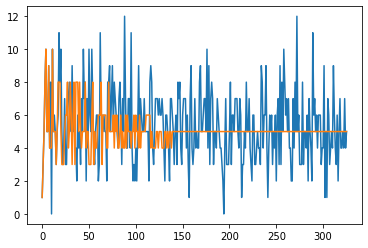

In [23]:
plt.plot(y_a)
plt.plot(y_pred)
plt.show()

In [61]:
xt_a = []
for i in range(len(tst)):
    xt_a.append([tst['Temperature'][i],tst['EventTarget'][i]])

In [62]:
X = []
Y = []
prev = 20
for i in range(len(x_a) - prev,len(x_a)):
    X.append(x_a[i])
    Y.append(y_a[i])

In [63]:
clf = XGBRegressor(colsample_bytree = 1, learning_rate = 1,
                max_depth = 5, alpha = 5, n_estimators = 10)
# clf = SVR(C = 100)
clf.fit(X, Y)
ya_pred = []
for i in range(len(xt_a)):
    ya_pred.append(clf.predict([xt_a[i]]))
#     y_pred = np.append(y_pred, clf.predict([xt_a[i]]))
    del X[0]
    X.append(xt_a[i])
    del Y[0]
    Y.append(clf.predict(xt_a[i]))
    clf = XGBRegressor(colsample_bytree = 1, learning_rate = 1,
                max_depth = 5, alpha = 5, n_estimators = 10)
    clf.fit(X,Y)
#     print(y_pred)

[01:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [64]:
ya_pred = np.round(ya_pred)
print(ya_pred)

[[4.]
 [5.]
 [5.]
 [6.]
 [6.]
 [4.]
 [4.]
 [4.]
 [5.]
 [6.]
 [7.]
 [4.]
 [4.]
 [4.]
 [4.]
 [6.]
 [4.]
 [6.]
 [5.]
 [6.]
 [4.]
 [6.]
 [6.]
 [4.]
 [6.]
 [6.]
 [5.]
 [4.]
 [4.]
 [5.]
 [6.]
 [6.]
 [4.]
 [6.]
 [4.]
 [6.]
 [5.]
 [6.]
 [6.]
 [5.]
 [5.]]


In [65]:
X = []
Y = []
prev = 20
for i in range(len(x_b) - prev,len(x_b)):
    X.append(x_b[i])
    Y.append(y_b[i])

In [66]:
clf = XGBRegressor(colsample_bytree = 1, learning_rate = 1,
                max_depth = 5, alpha = 5, n_estimators = 10)
# clf = SVR(C = 100)
clf.fit(X, Y)
yb_pred = []
for i in range(len(xt_a)):
    yb_pred.append(clf.predict([xt_a[i]]))
#     y_pred = np.append(y_pred, clf.predict([xt_a[i]]))
    del X[0]
    X.append(xt_a[i])
    del Y[0]
    Y.append(clf.predict(xt_a[i]))
    clf = XGBRegressor(colsample_bytree = 1, learning_rate = 1,
                max_depth = 5, alpha = 5, n_estimators = 10)
    clf.fit(X,Y)
#     print(y_pred)

[01:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [67]:
yb_pred = np.round(yb_pred)
print(yb_pred)

[[3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [3.]
 [3.]
 [3.]
 [3.]
 [2.]
 [4.]
 [2.]
 [3.]
 [4.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [3.]
 [4.]
 [4.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [3.]
 [4.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [68]:
X = []
Y = []
prev = 20
for i in range(len(x_c) - prev,len(x_c)):
    X.append(x_c[i])
    Y.append(y_c[i])

In [69]:
clf = XGBRegressor(colsample_bytree = 1, learning_rate = 1,
                max_depth = 5, alpha = 5, n_estimators = 10)
# clf = SVR(C = 100)
clf.fit(X, Y)
yc_pred = []
for i in range(len(xt_a)):
    yc_pred.append(clf.predict([xt_a[i]]))
#     y_pred = np.append(y_pred, clf.predict([xt_a[i]]))
    del X[0]
    X.append(xt_a[i])
    del Y[0]
    Y.append(clf.predict(xt_a[i]))
    clf = XGBRegressor(colsample_bytree = 1, learning_rate = 1,
                max_depth = 5, alpha = 5, n_estimators = 10)
    clf.fit(X,Y)
#     print(y_pred)

[01:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [70]:
yc_pred = np.round(yc_pred)
print(yc_pred)

[[5.]
 [5.]
 [5.]
 [3.]
 [3.]
 [5.]
 [5.]
 [5.]
 [5.]
 [4.]
 [3.]
 [7.]
 [5.]
 [4.]
 [7.]
 [4.]
 [7.]
 [3.]
 [5.]
 [3.]
 [5.]
 [3.]
 [3.]
 [5.]
 [3.]
 [3.]
 [5.]
 [5.]
 [5.]
 [5.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [4.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]]


In [71]:
final = []
for i in range(len(xt_a)):
    final.append(ya_pred[i][0])
    final.append(yb_pred[i][0])
    final.append(yc_pred[i][0])

In [56]:
final

[4.0,
 3.0,
 7.0,
 4.0,
 3.0,
 0.0,
 4.0,
 3.0,
 0.0,
 4.0,
 9.0,
 0.0,
 4.0,
 9.0,
 0.0,
 5.0,
 4.0,
 0.0,
 5.0,
 4.0,
 0.0,
 4.0,
 3.0,
 7.0,
 4.0,
 3.0,
 0.0,
 4.0,
 9.0,
 0.0,
 5.0,
 4.0,
 0.0,
 4.0,
 3.0,
 7.0,
 4.0,
 3.0,
 7.0,
 5.0,
 4.0,
 0.0,
 4.0,
 3.0,
 7.0,
 4.0,
 6.0,
 0.0,
 4.0,
 3.0,
 7.0,
 4.0,
 6.0,
 0.0,
 4.0,
 3.0,
 0.0,
 4.0,
 6.0,
 0.0,
 4.0,
 3.0,
 7.0,
 4.0,
 6.0,
 0.0,
 4.0,
 6.0,
 0.0,
 4.0,
 3.0,
 7.0,
 4.0,
 6.0,
 0.0,
 4.0,
 6.0,
 0.0,
 4.0,
 3.0,
 0.0,
 4.0,
 3.0,
 7.0,
 4.0,
 3.0,
 7.0,
 4.0,
 3.0,
 0.0,
 4.0,
 6.0,
 0.0,
 4.0,
 6.0,
 0.0,
 4.0,
 6.0,
 0.0,
 4.0,
 6.0,
 0.0,
 4.0,
 6.0,
 0.0,
 4.0,
 6.0,
 0.0,
 4.0,
 3.0,
 7.0,
 4.0,
 3.0,
 0.0,
 4.0,
 3.0,
 0.0,
 4.0,
 3.0,
 7.0,
 4.0,
 3.0,
 7.0]

In [72]:
df = pd.DataFrame(final)

In [73]:
df.to_csv('submit.csv')